<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
# 1. magic for inline plot
# 2. magic to print version
# 3. magic so that the notebook will reload external python modules
# 4. magic to enable retina (high resolution) plots
# https://gist.github.com/minrk/3301035
%matplotlib inline
%load_ext watermark
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format='retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import shap

%watermark -a 'Ethen' -d -t -v -p numpy,pandas,sklearn,matplotlib,lightgbm,shap

/Users/mingyuliu/anaconda3/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


Ethen 2019-05-03 20:38:28 

CPython 3.6.4
IPython 7.5.0

numpy 1.16.3
pandas 0.24.2
sklearn 0.20.3
matplotlib 3.0.3
lightgbm 2.2.4
shap 0.28.5


In [9]:
X, y = shap.datasets.adult()
X_display, y_display = shap.datasets.adult(display=True)
print('dimension:', X_display.shape)
X_display.head()

dimension: (32561, 12)


,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,State-gov,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States
1,50.0,Self-emp-not-inc,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States
2,38.0,Private,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States
3,53.0,Private,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States
4,28.0,Private,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba


In [10]:
# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
d_train = lgb.Dataset(X_train, label=y_train)
d_test = lgb.Dataset(X_test, label=y_test)

In [13]:
params = {
    "max_bin": 512,
    "learning_rate": 0.05,
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "binary_logloss",
    "num_leaves": 10,
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True
}
num_boost_round = 10000
early_stopping_rounds = 50
verbose_eval = 500

model = lgb.train(params, d_train, num_boost_round, valid_sets=[d_test],
                  early_stopping_rounds, verbose_eval)

Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[683]	valid_0's binary_logloss: 0.277144


In [17]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

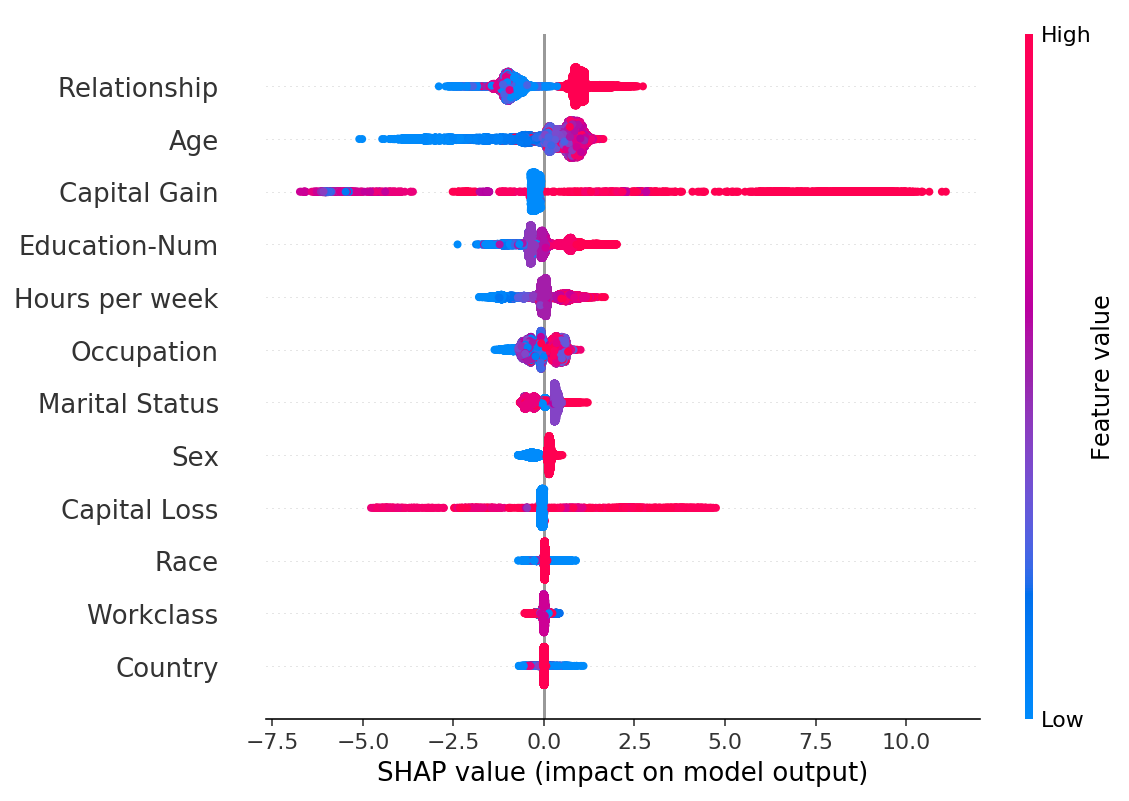

In [28]:
# change default style figure and font size
plt.rcParams['figure.figsize'] = 10, 8
plt.rcParams['font.size'] = 12

shap.summary_plot(shap_values, X)

In [31]:
sorted(zip(model.feature_importance(importance_type='gain'), X.columns))

[(453.17107996344566, 'Race'),
 (657.4742376506329, 'Country'),
 (990.9480431377888, 'Sex'),
 (1261.7115572094917, 'Marital Status'),
 (1374.8209599256516, 'Workclass'),
 (6852.486240297556, 'Occupation'),
 (7096.458193123341, 'Hours per week'),
 (9861.542196244001, 'Capital Loss'),
 (15501.561687916517, 'Age'),
 (23919.372629582882, 'Education-Num'),
 (30677.930699318647, 'Capital Gain'),
 (58280.6883264482, 'Relationship')]

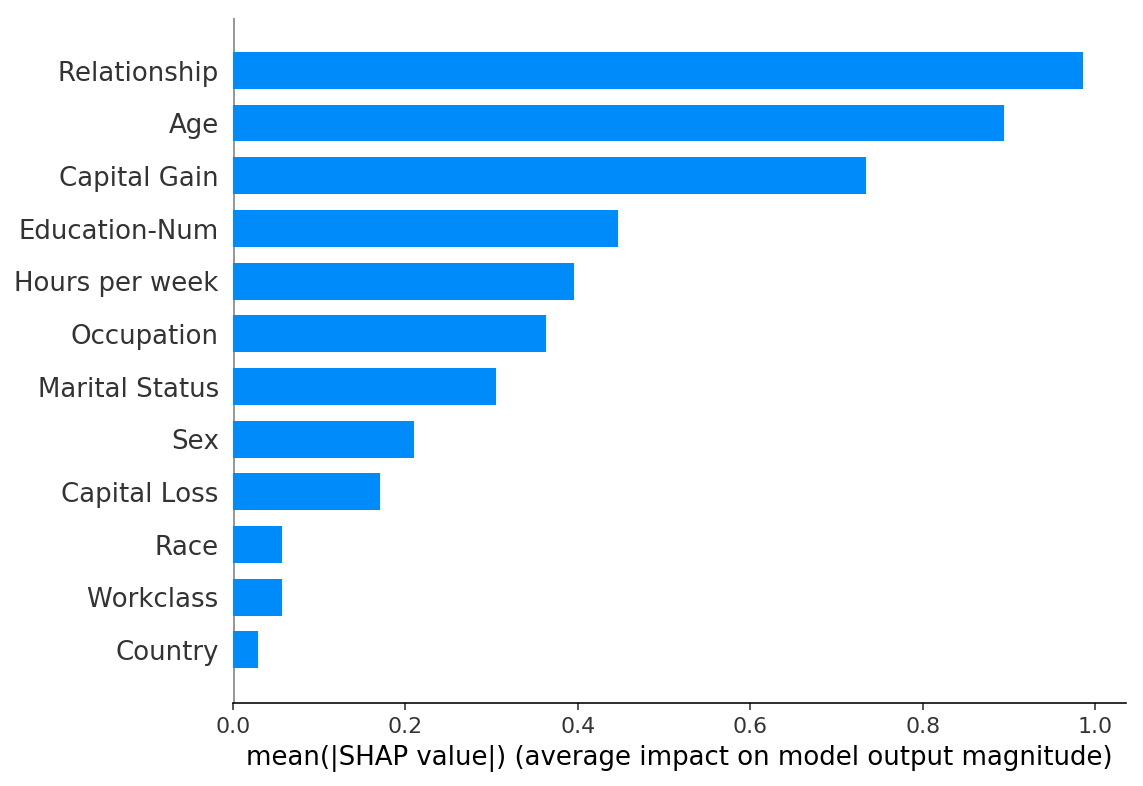

In [25]:
shap.summary_plot(shap_values, X, plot_type="bar")